# K-Anonymity + L-Diversity + T-Closeness

In the late 1990s Sweeney published several articles in which she proposed the concept of k-anonymity. Among them we cite the most famous one [1] published in 2002. At the time when anonymization was referring to the concept now known as depseudonymization. As we already discusses pseudonymization is the replacement of all directly identifying data (such as the social security number) with a random value (pseudonym). Sweeney showed in [1] that it was possible to re-identify a pseudonymized relational database (SQL or more generally a tabular file) and proposed a simple notion to prevent these kind of leak from hapenning.

## K-Anonymity

Let us suppose that we have a dataset that contains $N$ entries.
Each entry consists of a list of $D$ attributes $X_i$ ($i \in [0,D]$) that contain (non-sensitive) information about a person, such as age, gender, zip code of residence, etc. These attributes are called "quasi-identifiers", as combining several of them into a "super-identifier" can often uniquely identify a person even in large datasets (e.g. the combination of gender, age and zip code might be so specific that only a single person in a dataset has a given combination see [1] for more details).

k-anonymity protects the privacy of individual persons by pooling their attributes into groups of at **least $k$ people**. In addition, **the model assumes that the dataset contains a single sensitive attribute** that contains e.g. information about a person's income and that we want to protect. The method can also be generalized to datasets with more than one sensitive attribute or datasets where there's no clear distinction between quasi-identifiers and sensitive attributes. For this case study we will look at the simple case though. Now, k-anonymity demands that we group individual rows/persons of our dataset into group of at least $k$ rows/persons and **replace the quasi-identifier attributes of these rows with aggregate quantities**, such that it is no longer possible to read the individual values. This protects people by ensuring that an adversary who knows all values of a person's quasi-identifier attributes can only find out which group a person might belong to but not know if the person is really in the dataset.

The main advantage of k-anonymity is that it is easy to understand. However, the model is not robust when the sensitive values associated with a given quasi-identifier value are all identical. In this case, we can deduce that all people with this quasi-identifier value have the same sensitive data, which we are able to deduce. It is therefore impossible to ensure that the risk of re-dentification is limited, which means that a use of k-anonymity alone does not offer reasonable guarantees of anonymity. This problem can be fixed by using an extension of k-anonymity called "l-diversity".

## L-Diversity 

l-diversity, first introduced in 2007 in [2], ensures that each **k-anonymous group contains at least l different values** of the sensitive attribute. Therefore, even if an adversary can identify the group of a person he/she still would not be able to find out the value of that person's sensitive attribute with certainty. However, even when using l-diversity an adversary could still learn some information about a person's sensitive attribute using probabilistic reasoning: If, for example, 4 out of 5 people in a 5-anonymous group possess a given value of the sensitive attribute, an attacker can reason that a given person who he/she knows is part of the group will -with high probability- possess that value.
Again, this problem can be fixed by extending k-anonymity using a so-called "t-closeness" criterion. 

## T-Closeness

t-closeness, also introduced in 2007 in [3], demands that the statistical distribution of the sensitive attribute values in each k-anonymous group is "close" to the overall distribution of that attribute in the entire dataset. Typically, the closeness between two probability vectors $p=(p_1,...,p_l)$ and $q=(q_1,...,q_l)$ can be measured using e.g. the Kullback-Leibler (KL) divergence defined as follows: $$ D_{KL}(p,q) = \sum_{i=1}^{l}p_i \log(\frac{p_i}{q_i}).$$
An adversary could then only learn a limited amount of information from comparing the distribution of the values in the group to the distribution in the entire dataset.

Then begins to ask the question of the usefulness of the data. Due to proximity constraints, the data does not necessarily seem directly usable. However, it is still possible to identify trends, or perform general calculations or correlations on the whole table.
Of course, k-anonymity, l-diversity and t-closeness all limit the amount of information that a legitimate user can learn from the data as well, so typically we need to balance the degree of privacy against the utility of the resulting data. Eventhough the data does not necessarily seem directly usable. However, it is still possible to identify trends, or perform general calculations or correlations on the whole table.

## Implementing privacy conditions

Turning a dataset into a k-anonymous (and possibly l-diverse or t-close) dataset is a complex problem. Meyerson and Williams have shown in [4] that finding the optimal transformation of the database NP-difficult. Fortunately, several practical algorithms exists that often produce "good enough" results by employing **greedy search techniques**.

In this notebook, we will explore the so-called "Mondrian" (see [5] for more details) algorithm, which uses a greedy search method to partition the original data into smaller and smaller groups. The algorithm assumes that we have converted all attributes into numerical or categorical values and that we're able to measure the "span" of a given data attribute $X_i$ ("span" will be detailed later).

### Partitioning

The algorithm proceeds then as follows to partition the data into k groups:

1. Initialize the final set of partitions to an empty set $P_{final} = \{\}$.
2. Initialize the temporary set of paritions to a set containing a partition with the entire dataset $P_{temp} = \{\{1, 2,\dots ,N\}\}$.
4. While there are partitions in the temporary set, pop one partition from it.
  * Calculate the relative spans of all columns in the partition.
  * Sort the resulting columns by their span (in descending order) and iterate over them. 
  * For each column,
      * Try to split the partition along that column using the median of the column values as the split point.
      * Check if the resulting partitions are valid according to k-anonymity (and possibly additional) criteria.
      * If yes, add the two new partitions to the temporary set and break out of the loop.
  * If no column produced a valid split, add the original partition to the set of final partitions.
5. Return the final set of partitions

### Data Aggregation

After obtaining the partitions we still need to aggregate the values of the quasi identifiers and the sensitive attributes in each k-anonymous group. For this, we can e.g. replace numerical attributes with their range (e.g. "age: 24-28") and categorical attributes with their union (e.g. "employment-group: [self-employed, employee, worker]"), though other aggregations are possible. An open source tool developed by the Technological University of Munich, ARX (see [6]) allows anonymisation according to many models from original data in tabular format. The tool also makes it possible to estimate the risks of de-anonymization according to the models presented above, and even in a finer way by calculating the distribution of the probabilities of de-anonymization and not simply the maximum values.

## Biliography

- [1] [k-Anonymity: A Model For Protecting Privacy](https://epic.org/privacy/reidentification/Sweeney_Article.pdf)
- [2] [l-Diversity: Privacy Beyond k-Anonymity](https://personal.utdallas.edu/~muratk/courses/privacy08f_files/ldiversity.pdf)
- [3] [t-Closeness: Privacy Beyond k-Anonymity and l-Diversity](https://www.cs.purdue.edu/homes/ninghui/papers/t_closeness_icde07.pdf)
- [4] [On the Complexity of Optimal K-Anonymity](http://www.aladdin.cs.cmu.edu/papers/pdfs/y2004/kanonim.pdf)
- [5] [Mondrian - Multidimensional k-Anonymity](https://www.utdallas.edu/~muratk/courses/privacy08f_files/MultiDim.pdf)
- [6] [Putting statistical disclosure control into practice: The ARX data anonymization tool](https://link.springer.com/chapter/10.1007/978-3-319-23633-9_6)


In [9]:
# we use Pandas to work with the data as it makes working with categorical data very easy
import pandas as pd
import io
import requests

In [13]:
# this is a list of the column names in our dataset (as the file doesn't contain any headers)
names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
)

# some fields are categorical and will require special treatment
categorical = set((
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'sex',
    'native-country',
    'race',
    'income',
))

## Loading Dataset

In [15]:
url="https://raw.githubusercontent.com/professeurr/privacy/main/adult.all.txt"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=", ", header=None, names=names, index_col=False, engine='python');# We load the data using Pandas

In [16]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k


In [20]:
for name in categorical:
    df[name] = df[name].astype('category')

In [25]:
print(df.index)
print(df.loc[[0, 1], :])
print(df.loc[[0, 1], :]['age'])
print(df.dtypes)
print(df['age'].max())

RangeIndex(start=0, stop=48842, step=1)
   age         workclass  fnlwgt  ... hours-per-week  native-country income
0   39         State-gov   77516  ...             40   United-States  <=50k
1   50  Self-emp-not-inc   83311  ...             13   United-States  <=50k

[2 rows x 15 columns]
0    39
1    50
Name: age, dtype: int64
age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object
90


## Exercise

**Implement a function that returns the spans (max-min for numerical columns, number of different values for categorical columns) of all columns for a partition of a dataframe.** 

In [26]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe of reference
    :param partition: the partition for which to calculate the spans
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    spans = dict()
    for column in df.columns:
      col_data = df[column][partition]

      if df.dtypes[column].name == 'category':
        span = col_data.nunique()
      else:
        span = col_data.max() - col_data.min()
      
      if scale is not None:
        span = span/scale[column]
      
      spans[column] = span

    return spans

In [27]:
full_spans = get_spans(df, df.index)
full_spans

{'age': 73,
 'capital-gain': 99999,
 'capital-loss': 4356,
 'education': 16,
 'education-num': 15,
 'fnlwgt': 1478115,
 'hours-per-week': 98,
 'income': 2,
 'marital-status': 7,
 'native-country': 42,
 'occupation': 15,
 'race': 5,
 'relationship': 6,
 'sex': 2,
 'workclass': 9}

## Exercise

**Implement a `split` function that takes a dataframe, a current partition and a column as inputs and returns two ensembles that split the given partition such that all rows with values of the column `column` below the median are in one ensemble and all rows with values above or equal to the median are in the other.**

In [29]:
def split(df, partition, column):
    """
    :param        df: The dataframe of reference
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
    col_data = df[column][partition]
    if df.dtypes[column].name != 'category':
      median = col_data.median()
      return (col_data.index[col_data <= median], col_data.index[col_data > median])
    else:
      values = col_data.unique().tolist()
      left_values = values[:int(len(values)/2)]
      right_values = values[int(len(values)/2):]
      return (col_data.index[col_data.isin(left_values)], col_data.index[col_data.isin(right_values)])


In [33]:
split_by_xx = split(df, df.index[0:13], 'age')
split_by_xx

(Int64Index([2, 4, 5, 8, 10, 11, 12], dtype='int64'),
 Int64Index([0, 1, 3, 6, 7, 9], dtype='int64'))

## Exercise

Now that we have all helper functions in place, we can implement the partition algorithm discussed above:

**Implement the partitioning algorithm discussed above, using a k-anonymous criterion for the partitions you create.**

In [34]:
def is_k_anonymous(df, partition, sensitive_column, k=3):
    """
    :param               df: The dataframe on which to check the partition.
    :param        partition: The partition of the dataframe to check.
    :param sensitive_column: The name of the sensitive column
    :param                k: The desired k
    :returns               : True if the partition is valid according to our k-anonymity criteria, False otherwise.
    """
    return len(partition) >= k

def partition_dataset(df, feature_columns, sensitive_column, scale, is_valid):
    """
    :param               df: The dataframe to be partitioned.
    :param  feature_columns: A list of column names along which to partition the dataset.
    :param sensitive_column: The name of the sensitive column (to be passed on to the `is_valid` function)
    :param            scale: The column spans as generated before.
    :param         is_valid: A function that takes a dataframe and a partition and returns True if the partition is valid.
    :returns               : A list of valid partitions that cover the entire dataframe.
    """
    result = []
    current_partitions = [df.index]
    while current_partitions:
      current_partition = current_partitions.pop(0)
      spans = get_spans(df[feature_columns], current_partition, scale)
      sorted(spans.items(), key=lambda item: -item[1])
      find_split = False
      for column in spans.keys():
        left_partition, right_partition = split(df, current_partition, column)
        if is_valid(df, left_partition, sensitive_column) and is_valid(df, right_partition, sensitive_column):
          current_partitions.extend((left_partition, right_partition))
          find_split = True
          break
      if not find_split:
        result.append(current_partition)

    return result




Now let's try this on our dataset! To keep things simple, we will at first select only two columns from the dataset that we apply the partitioning to. This makes it easier to check/visualize the result and speed up the execution (the naive algorithms can take several minutes when running on the entire dataset) 

In [35]:
# we apply our partitioning method to two columns of our dataset, using "income" as the sensitive attribute
feature_columns = ['age', 'hours-per-week']
sensitive_column = 'income'
final_partitions = partition_dataset(df, feature_columns, sensitive_column, full_spans, is_k_anonymous)

In [37]:
# we get the number of partitions that were created
len(final_partitions)

657

Let's visualize the created partitions! To do that, we will write functions to get the rectangular bounds of a partition along two columns. We can then plot these rectangles to see how our partitioning function divides the dataset. If we perform the partition only along the two columns selected for plotting then the resulting rectangles should not overlap and cover the entire dataset.

In [ ]:
import matplotlib.pylab as pl
import matplotlib.patches as patches

In [ ]:
def build_indexes(df):
    indexes = {}
    for column in categorical:
        values = sorted(df[column].unique())
        indexes[column] = { x : y for x, y in zip(values, range(len(values)))}
    return indexes

def get_coords(df, column, partition, indexes, offset=0.1):
    if column in categorical:
        sv = df[column][partition].sort_values()
        l, r = indexes[column][sv[sv.index[0]]], indexes[column][sv[sv.index[-1]]]+1.0
    else:
        sv = df[column][partition].sort_values()
        next_value = sv[sv.index[-1]]
        larger_values = df[df[column] > next_value][column]
        if len(larger_values) > 0:
            next_value = larger_values.min()
        l = sv[sv.index[0]]
        r = next_value
    # we add some offset to make the partitions more easily visible
    l -= offset
    r += offset
    return l, r

def get_partition_rects(df, partitions, column_x, column_y, indexes, offsets=[0.1, 0.1]):
    rects = []
    for partition in partitions:
        xl, xr = get_coords(df, column_x, partition, indexes, offset=offsets[0])
        yl, yr = get_coords(df, column_y, partition, indexes, offset=offsets[1])
        rects.append(((xl, yl),(xr, yr)))
    return rects

def get_bounds(df, column, indexes, offset=1.0):
    if column in categorical:
        return 0-offset, len(indexes[column])+offset
    return df[column].min()-offset, df[column].max()+offset

In [ ]:
feature_columns

['age', 'hours-per-week']

In [ ]:
# we calculate the bounding rects of all partitions that we created
indexes = build_indexes(df)
column_x, column_y = feature_columns[:2]
rects = get_partition_rects(df, final_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

In [ ]:
# let's see how our rectangles look like
rects[:10]

[((27.0, 1.0), (29.0, 41.0)),
 ((32.0, 1.0), (34.0, 41.0)),
 ((34.0, 2.0), (36.0, 41.0)),
 ((23.0, 1.0), (24.0, 41.0)),
 ((26.0, 3.0), (27.0, 41.0)),
 ((29.0, 1.0), (31.0, 41.0)),
 ((31.0, 3.0), (32.0, 41.0)),
 ((36.0, 2.0), (37.0, 41.0)),
 ((37.0, 4.0), (38.0, 41.0)),
 ((40.0, 2.0), (41.0, 41.0))]

In [ ]:
# we plot the rectangles
def plot_rects(df, ax, rects, column_x, column_y, edgecolor='black', facecolor='none'):
    for (xl, yl),(xr, yr) in rects:
        ax.add_patch(patches.Rectangle((xl,yl),xr-xl,yr-yl,linewidth=1,edgecolor=edgecolor,facecolor=facecolor, alpha=0.5))
    ax.set_xlim(*get_bounds(df, column_x, indexes))
    ax.set_ylim(*get_bounds(df, column_y, indexes))
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)

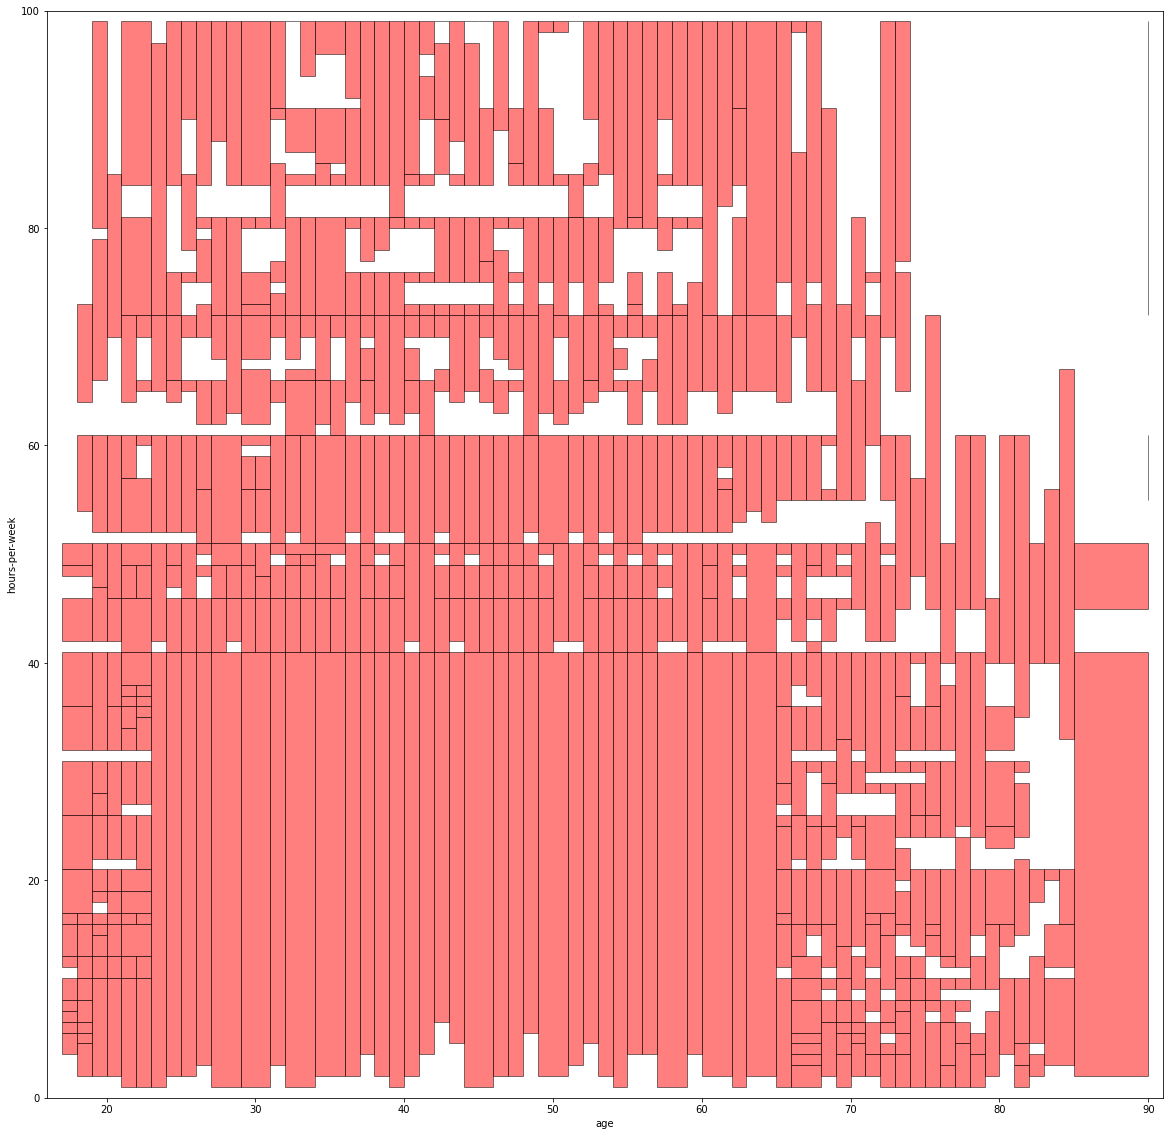

In [ ]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, rects, column_x, column_y, facecolor='r')
#pl.scatter(df[column_x], df[column_y])

**Brifely analyze the result we get.**

## Analyse et commentaires

Le graphique réalisé permet de visualiser la valeur de l'amplitude des classes à constituer sur la base de la combinaison des attributs {*age*, *hours-per-week*} afin de constituer des tuples identiques de ce couple d'attributs qui apparaissent au moins k fois (avec ici k fixé à 3) au sein d'un groupe. Compte-tenu de la distribution jointe des attributs *age* et *hours-per-week*, la taille des intervalles à considérer sur chacun des attributs est variable. Elle est ainsi très faible pour les personnes les plus jeunes travaillant un faible nombre d'heures alors qu'il faut considérer une classe d'âge et un nombre d'heures travaillées d'amplitudes larges pour les personnes les plus âgées. On note par ailleurs un effet de seuil dans la constitution des partitions pour la valeur 40 de l'attribut *hours-per-week*.

# Generating an k-Anonymous Dataset

Of course, to use the data we want to produce a new dataset that contains one row for each partition and value of the sensitive attribute. To do this, we need to aggregate the columns in each partition.  Let's do this!

In [ ]:
def agg_categorical_column(series):
    return [','.join(set(series))]

def agg_numerical_column(series):
    return [series.mean()]

In [ ]:
def build_anonymized_dataset(df, partitions, feature_columns, sensitive_column, max_partitions=None):
    aggregations = {}
    for column in feature_columns:
        if column in categorical:
            aggregations[column] = agg_categorical_column
        else:
            aggregations[column] = agg_numerical_column
    rows = []
    for i, partition in enumerate(partitions):
        if i % 100 == 1:
            print("Final {} partitions...".format(i))
        if max_partitions is not None and i > max_partitions:
            break
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        sensitive_counts = df.loc[partition].groupby(sensitive_column).agg({sensitive_column : 'count'})
        values = grouped_columns.iloc[0].to_dict()
        for sensitive_value, count in sensitive_counts[sensitive_column].items():
            if count == 0:
                continue
            values.update({
                sensitive_column : sensitive_value,
                'count' : count,

            })
            rows.append(values.copy())
    return pd.DataFrame(rows)

In [ ]:
dfn = build_anonymized_dataset(df, final_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...
Final 301 partitions...
Final 401 partitions...
Final 501 partitions...
Final 601 partitions...


In [ ]:
# we sort the resulting dataframe using the feature columns and the sensitive attribute
dfn.sort_values(feature_columns+[sensitive_column])

,age,hours-per-week,income,count
1134,17.000000,4.692308,<=50k,13
1135,17.000000,6.000000,<=50k,9
1082,17.000000,7.000000,<=50k,5
971,17.000000,8.000000,<=50k,19
742,17.000000,9.921053,<=50k,38
...,...,...,...,...
741,89.222222,48.333333,>50k,5
967,90.000000,58.333333,<=50k,2
968,90.000000,58.333333,>50k,1
969,90.000000,90.000000,<=50k,2


# Implementing l-diversity (the naive way)

Now let's see how we can implement l-diversity in order to protect the privacy of the persons in the dataset even better. To implement l-diversity, we can do the following things:

* Modify our `is_valid` function to not only check for the size of a given partition but also ensure that the values of the sensitive attribute in the partition are diverse enough.
* Modify the `split` function to produce splits that are diverse (if possible)

Here we will only implement the first point to keep things simple, please keep in mind that this is not the smartest way to implement l-diversity, as our "naive" splitting function might produce invalid splits even when it would actually be possible to produce a valid one.

## Exercise

**Implement a validator function that returns `True` if a given partition contains at least `l` different values of the sensitive attribute, `False` otherwise.**

In [ ]:
def is_l_diverse(df, partition, sensitive_column, l=2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param                l: The minimum required diversity of sensitive attribute values in the partition
    """
    return df[sensitive_column][partition].nunique() >= l

In [ ]:
# now let's apply this method to our data and see how the result changes
final_l_diverse_partitions = partition_dataset(df, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(*args) and is_l_diverse(*args))

In [ ]:
len(final_l_diverse_partitions)

485

In [ ]:
column_x, column_y = feature_columns[:2]
l_diverse_rects = get_partition_rects(df, final_l_diverse_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

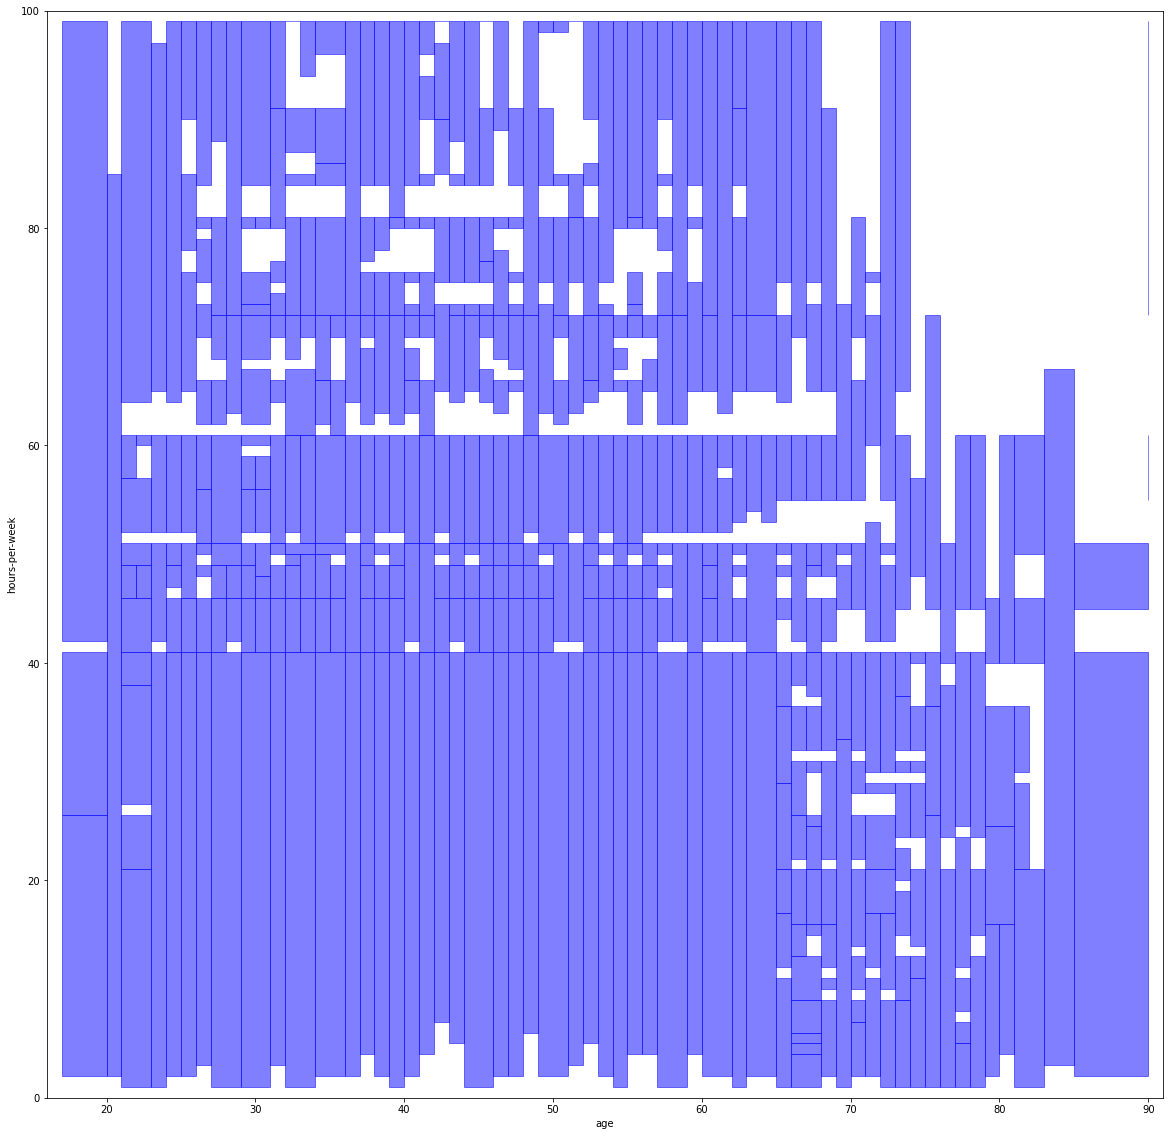

In [ ]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, l_diverse_rects, column_x, column_y, edgecolor='b', facecolor='b')

**Brifely analyze the result we get. Compare with simple k-anonymity**

## Analyse et commentaires

Par rapport à la k-anonymity simple, la l-diversity impose comme critère supplémentaire que chaque partition préalablement constituée comporte au moins l (avec ici l fixé à 2, soit le nombre de modalités possibles de la variable catégorielle income) valeurs différentes de l'attribut sensible. Par rapport aux résultats obtenus avec la k-anonymity simple, cette contrainte supplémentaire entraîne une réduction du nombre de partitions, qui passe de 601 à 485. Graphiquement, ceci se traduit par une augmentation de l'aire des rectangles obtenus et donc de l'amplitude des classes à retenir pour chacun des attributs *age* et *hours-per-week*. Ainsi, alors que le groupe des jeunes travaillant peu d'heures pouvait être "protégé" avec des classes de faible amplitude dans le cadre de la simple k=3-anonymity, l'amplitude des classes nécessaire pour regrouper des enregistrements présentant au moins 2 valeurs différentes de l'attribut sensible *income* s'élargit de façon très importante. S'agissant des plus jeunes travaillant le moins d'heures, le nombre d'individus nécessaires passe à 1384, 1 seul individu sur les 1384 présentant du reste une valeur de la variable *income* supérieure à 50k. La présence de cette unique observation suffit cependant pour atteindre la 2-diversity exigée dans la partition créée.

In [ ]:
# again we build an anonymized dataset from the l-diverse partitions
dfl = build_anonymized_dataset(df, final_l_diverse_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...
Final 301 partitions...
Final 401 partitions...


In [ ]:
# Let's see how l-diversity improves the anonymity of our dataset
dfl.sort_values([column_x, column_y, sensitive_column])

,age,hours-per-week,income,count
8,17.987717,17.529624,<=50k,1383
9,17.987717,17.529624,>50k,1
36,18.398204,36.066866,<=50k,1001
37,18.398204,36.066866,>50k,1
38,18.612903,52.822581,<=50k,123
...,...,...,...,...
731,89.222222,48.333333,>50k,5
904,90.000000,58.333333,<=50k,2
905,90.000000,58.333333,>50k,1
906,90.000000,90.000000,<=50k,2


# Implementing t-closeness

As we can see, for regions where the value diversity is low, our l-diverse method produces partitions that contain a very large number of entries for one value of the sensitive attribute and only one entry for the other value. This is not ideal as while there is "plausible deniability" for a person in the dataset (after all the person could be the one "outlier") but an adversary can still be very certain about the person's attribute value in that case.

t-closeness solves this problem by making sure that the distribution of sensitive attribute values in a given partition is similar to the distribution of the values in the overall dataset. We'll implement a naive (and not efficient / correct) version of t-closeness below. As with the l-diversity case, it would be better to tailor the `split` function to produce partitions that are t-close, which would increase the efficiency of the method.

## Exercise

**Implement a version of the `is_valid` function that returns `True` if the partition is diverse enough and `False` otherwise. To measure diversity, calculate the total variation distance (easier to implement compared to KL) between the empirical probability distribution of the sensitive attribute over the entire dataset vs. the distribution over
the partition. Hint: the total variation distance is the maximum pointwise absolute difference between the two distributions. You can assume that the sensitive attribute is a categorical value.**

In [ ]:
# here we generate the global frequencies for the sensitive column 
global_freqs = {}
total_count = float(len(df))
group_counts = df.groupby(sensitive_column)[sensitive_column].agg('count')
for value, count in group_counts.to_dict().items():
    p = count/total_count
    global_freqs[value] = p

In [ ]:
global_freqs

{'<=50k': 0.7607182343065395, '>50k': 0.23928176569346055}

In [ ]:
def is_t_close(df, partition, sensitive_column, global_freqs, p=0.2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param     global_freqs: The global frequencies of the sensitive attribute values
    :param                p: The maximum allowed distance
    """
    total_count = float(len(partition))
    dist_max = -1
    group_counts = df.loc[partition, :].groupby(sensitive_column)[sensitive_column].agg('count')
    for value, count in group_counts.to_dict().items():
        p = count/total_count
        dist = abs(p - global_freqs[value])
        if dist_max == -1 or dist > dist_max:
            dist_max = dist
    return dist_max <= p

In [ ]:
# Let's apply this to our dataset
final_t_close_partitions = partition_dataset(df, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(*args) and is_t_close(*args, global_freqs))

In [ ]:
len(final_t_close_partitions)

280

In [ ]:
dft = build_anonymized_dataset(df, final_t_close_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...


In [ ]:
# Let's see how t-closeness fares
dft.sort_values([column_x, column_y, sensitive_column])

,age,hours-per-week,income,count
0,27.681429,39.214863,<=50k,21604
1,27.681429,39.214863,>50k,3370
16,38.000000,37.455145,<=50k,564
17,38.000000,37.455145,>50k,194
178,38.000000,44.239669,<=50k,79
...,...,...,...,...
426,89.222222,48.333333,>50k,5
531,90.000000,58.333333,<=50k,2
532,90.000000,58.333333,>50k,1
533,90.000000,90.000000,<=50k,2


In [ ]:
column_x, column_y = feature_columns[:2]
t_close_rects = get_partition_rects(df, final_t_close_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

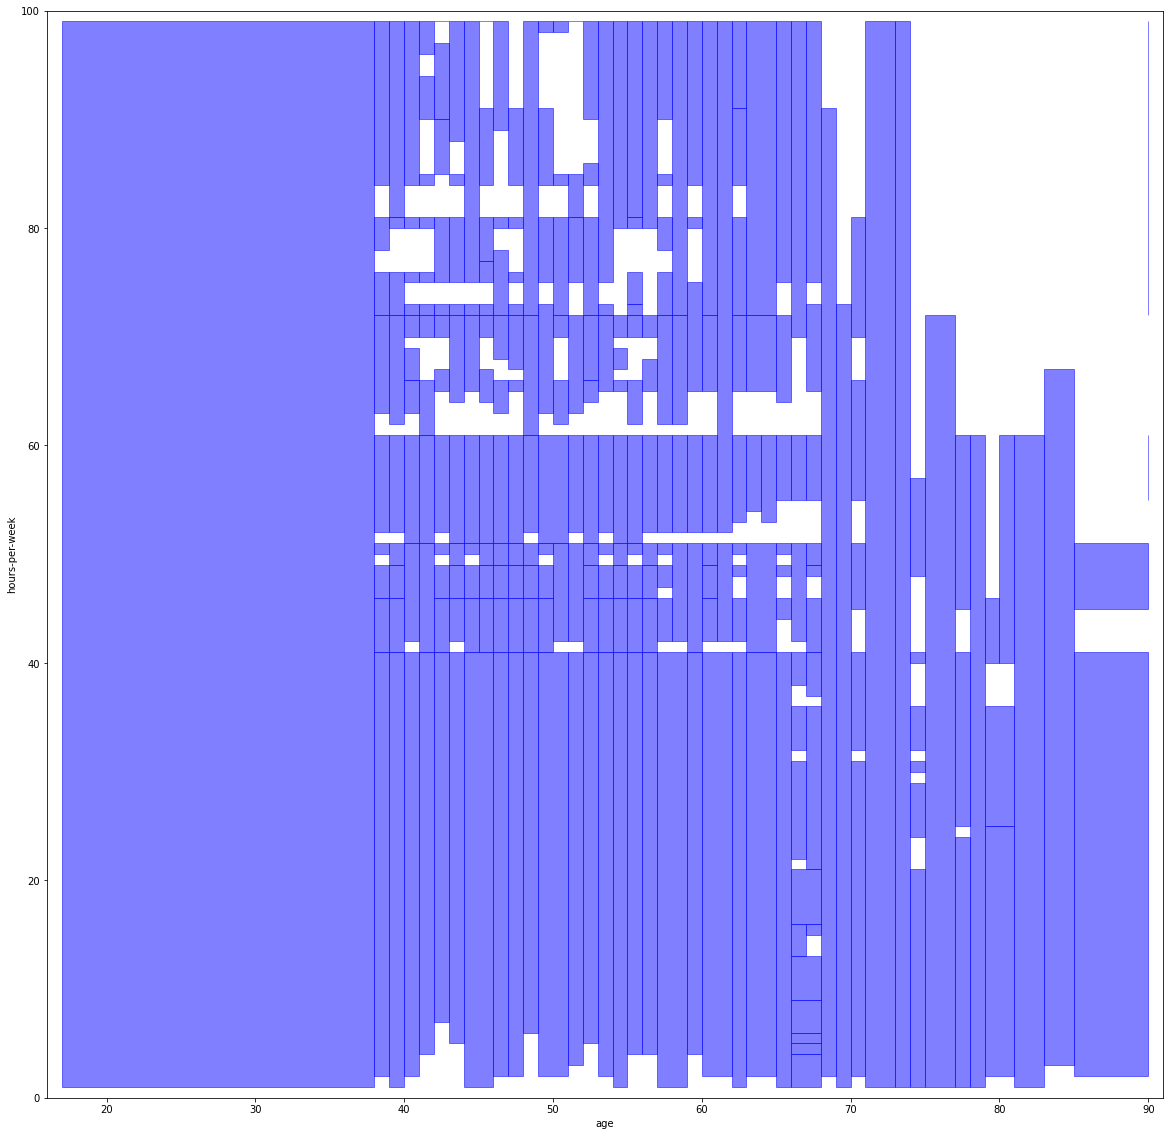

In [ ]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, t_close_rects, column_x, column_y, edgecolor='b', facecolor='b')

## Exercise

**Brifely analyze the result we get. Compare with simple l-diversity and simple k-anonymity**

Par rapport à la l-diversity, la t-closeness impose comme contrainte supplémentaire que la distribution de la variable sensible au sein d'une partition soit identique à celle observée au niveau de l'échantillon global. Les paramètres de la distribution sont ici réduits à la seule fréquence des valeurs prises par la valeur de la variable sensible dans la base complète dans la mesure où la variable est dichotomique, soit 76% pour la modalité <=50k et 24% pour la modalité >50k. Cette contrainte entraîne une diminution supplémentaire du nombre de partitions. Le phénomène le plus marquant concernant l'élargissement des intervalles nécessaires pour la constitution de la paritition des plus jeunes. Ceci n'a cependant rien de surprenant dans la mesure où les plus jeunes sont également ceux dont les revenus sont les plus faibles. Il faut donc augmenter l'age maximum et le nombre d'heures maximum de la classe pour otenir une proportion de revenus supérieurs à 50k égale à celle observée au niveau de la base complète.